In [862]:
# importing python packages/libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [863]:
df_robusta_coffee = pd.read_csv('robusta_ratings_raw.csv')
df_arabica_coffee = pd.read_csv('arabica_ratings_raw.csv')
display(df_robusta_coffee.head())

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact
0,0,83.75,NaN,NaN,NaN,NaN,NaN,Robusta,Ankole coffee producers coop,Uganda,...,12 %,0 full defects,0,Green,2 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1,0,83.50,NaN,NaN,NaN,NaN,NaN,Robusta,Nishant Gurjer,India,...,0 %,0 full defects,0,NaN,2 full defects,NaN,"October 31st, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
2,0,83.25,NaN,NaN,NaN,NaN,NaN,Robusta,Andrew Hetzel,India,...,0 %,0 full defects,0,Green,0 full defects,NaN,"April 29th, 2016",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
3,0,83.00,NaN,NaN,NaN,NaN,NaN,Robusta,UGACOF,Uganda,...,12 %,0 full defects,0,Green,7 full defects,NaN,"July 14th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
4,0,83.00,NaN,NaN,NaN,NaN,NaN,Robusta,Katuka Development Trust Ltd,Uganda,...,12 %,0 full defects,0,Green,3 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073


In [864]:
df_coffee = pd.read_csv('robusta_ratings_raw.csv')
df_coffee.shape

(28, 51)

In [865]:
# Renaming the column '* quality_score'.
df_robusta_coffee.rename(
    columns={"quality_score":"Quality_Score"},inplace=True)

In [866]:
# There are 53 columns,not all of them are useful.
df_robusta_coffee.columns

Index(['Unnamed: 0', 'Quality_Score', 'view_certificate_1',
       'view_certificate_2', 'Cupping Protocol and Descriptors',
       'View Green Analysis Details', 'Request a Sample', 'Species', 'Owner',
       'Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner.1', 'Variety', 'Status', 'Processing Method', 'NA',
       'Fragrance / Aroma', 'Flavor', 'Aftertaste', 'Salt / Acid',
       'Bitter / Sweet', 'Mouthfeel', 'NA.1', 'Uniform Cup', 'Clean Cup',
       'Balance', 'Cupper Points', 'Total Cup Points', 'NA.2', 'Moisture',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'NA.3', 'Expiration', 'Certification Body', 'Certification Address',
       'Certification Contact'],
      dtype='object')

In [867]:
# Checking the datatype
display(df_robusta_coffee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        28 non-null     int64  
 1   Quality_Score                     28 non-null     float64
 2   view_certificate_1                0 non-null      float64
 3   view_certificate_2                0 non-null      float64
 4   Cupping Protocol and Descriptors  0 non-null      float64
 5   View Green Analysis Details       0 non-null      float64
 6   Request a Sample                  0 non-null      float64
 7   Species                           28 non-null     object 
 8   Owner                             28 non-null     object 
 9   Country of Origin                 28 non-null     object 
 10  Farm Name                         25 non-null     object 
 11  Lot Number                        6 non-null      object 
 12  Mill      

None

In [868]:
df_arabica_coffee.columns.difference(df_robusta_coffee.columns)

Index(['* quality_score', 'Acidity', 'Aroma', 'Body', 'Notes', 'Sweetness',
       'Uniformity', 'Unnamed: 51'],
      dtype='object')

In [869]:
df_robusta_coffee.rename(
    columns={"Salt / Acid": "Acidity",
             "Fragrance / Aroma": "Aroma",
             "Bitter / Sweet": "Sweetness",
             "Uniform Cup": "Uniformity",
             "Mouthfeel": "Body"
            },inplace=True)

df_arabica_coffee.rename(
    columns={"* quality_score":"quality_score"},inplace=True)

In [870]:
display(df_arabica_coffee.shape)
display(df_robusta_coffee.shape)

(1312, 53)

(28, 51)

In [871]:
# Removing the columns with high proportion of missing values.
df_robusta_coffee.drop(['Unnamed: 0','NA.3','NA.2','view_certificate_1','view_certificate_2','Cupping Protocol and Descriptors','View Green Analysis Details','Request a Sample','Lot Number','Certification Address','Certification Contact','Owner.1','Bag Weight','Mill','ICO Number','NA','Quakers','NA.1'],axis=1,inplace=True) 
df_robusta_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Balance,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Expiration,Certification Body
0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,Ankole Coffee Producers Coop,1488,Sheema South Western,Ankole coffee producers coop,300,...,10.0,7.92,8.00,Sample 83.75,12 %,0 full defects,Green,2 full defects,"June 26th, 2015",Uganda Coffee Development Authority
1,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,Kaapi Royale,3170,Chikmagalur Karnataka Indua,Nishant Gurjer Kaapi Royale,320,...,10.0,7.92,8.00,Sample 83.50,0 %,0 full defects,NaN,2 full defects,"October 31st, 2018",Specialty Coffee Association
2,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,Sethuraman Estate,1000m,Chikmagalur,Nishant Gurjer,300,...,10.0,7.92,8.00,Sample 83.25,0 %,0 full defects,Green,0 full defects,"April 29th, 2016",Specialty Coffee Association
3,83.00,Robusta,UGACOF,Uganda,UGACOF project area,UGACOF Ltd,1212,Central,UGACOF,320,...,10.0,7.75,8.08,Sample 83.00,12 %,0 full defects,Green,7 full defects,"July 14th, 2015",Uganda Coffee Development Authority
4,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,Katuka Development Trust Ltd,1200-1300,Luwero central region,Katuka Development Trust Ltd,1,...,10.0,7.75,7.67,Sample 83.00,12 %,0 full defects,Green,3 full defects,"June 26th, 2015",Uganda Coffee Development Authority


In [872]:
# In order to analyze the dataset better,splitting in measures, beans and origin.

measures = ['Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
             'Cupper Points','Total Cup Points']

beans = ['Species', 'Harvest Year', 'Grading Date','Variety', 'Processing Method', 'Moisture', 'Category One Defects' 
        ,'Color', 'Category Two Defects','Expiration']

origin = ['Country of Origin','Region','Altitude']

In [873]:
# Measure:
# Checking the dataset filtered by measures.
df_robusta_coffee[measures].head(10)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points
0,7.83,8.08,7.75,7.92,8.25,7.92,10.0,10.0,8.00,8.00,Sample 83.75
1,8.00,7.75,7.92,8.00,7.92,7.92,10.0,10.0,8.00,8.00,Sample 83.50
2,7.92,7.83,7.92,8.00,7.83,7.92,10.0,10.0,7.83,8.00,Sample 83.25
3,8.00,7.92,7.92,7.75,7.83,7.75,10.0,10.0,7.75,8.08,Sample 83.00
4,8.33,7.83,7.83,7.75,8.25,7.75,10.0,10.0,7.58,7.67,Sample 83.00
5,8.00,7.92,7.67,8.00,7.75,7.92,10.0,10.0,7.75,7.75,Sample 82.75
6,7.67,7.75,7.83,7.83,7.92,7.75,10.0,10.0,8.00,7.83,Sample 82.58
7,7.67,7.75,7.83,7.67,7.92,7.83,10.0,10.0,7.92,7.92,Sample 82.50
8,7.67,7.75,7.58,7.83,7.83,8.00,10.0,10.0,7.92,7.92,Sample 82.50
9,7.67,7.83,7.83,7.83,7.92,7.75,10.0,10.0,7.75,7.83,Sample 82.42


In [874]:
# Checking missing values. 
df_arabica_coffee[measures].isna().sum()

Aroma               0
Flavor              0
Aftertaste          0
Acidity             0
Body                0
Balance             0
Uniformity          0
Clean Cup           0
Sweetness           0
Cupper Points       0
Total Cup Points    0
dtype: int64

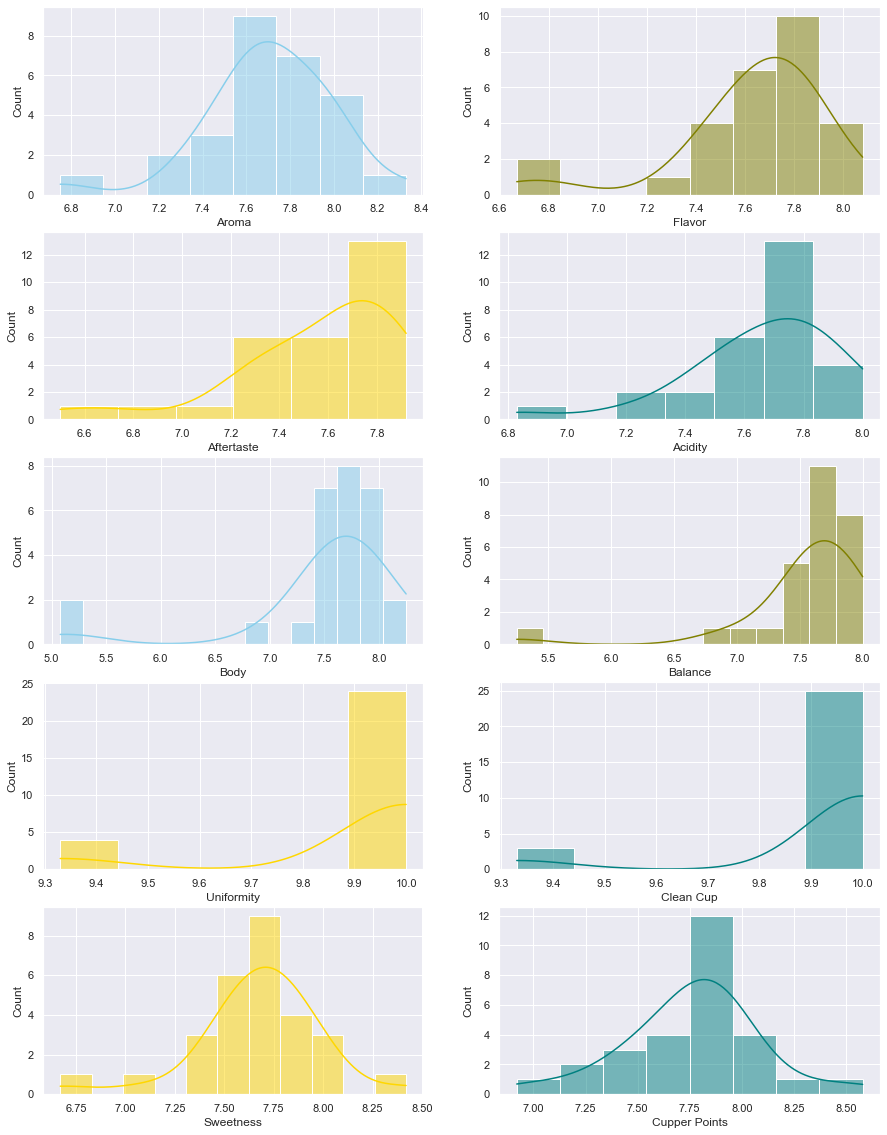

In [875]:
# Checking the distribution of each coffee characteristics.
sns.set(style="darkgrid")

fig,axs = plt.subplots(5, 2, figsize=(15, 20))

sns.histplot(data=df_robusta_coffee, x="Aroma", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_robusta_coffee, x="Flavor", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_robusta_coffee, x="Aftertaste", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_robusta_coffee, x="Acidity", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df_robusta_coffee, x="Body", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df_robusta_coffee, x="Balance", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df_robusta_coffee, x="Uniformity", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df_robusta_coffee, x="Clean Cup", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=df_robusta_coffee, x="Sweetness", kde=True, color="gold", ax=axs[4, 0])
sns.histplot(data=df_robusta_coffee, x="Cupper Points", kde=True, color="teal", ax=axs[4, 1])

plt.show()

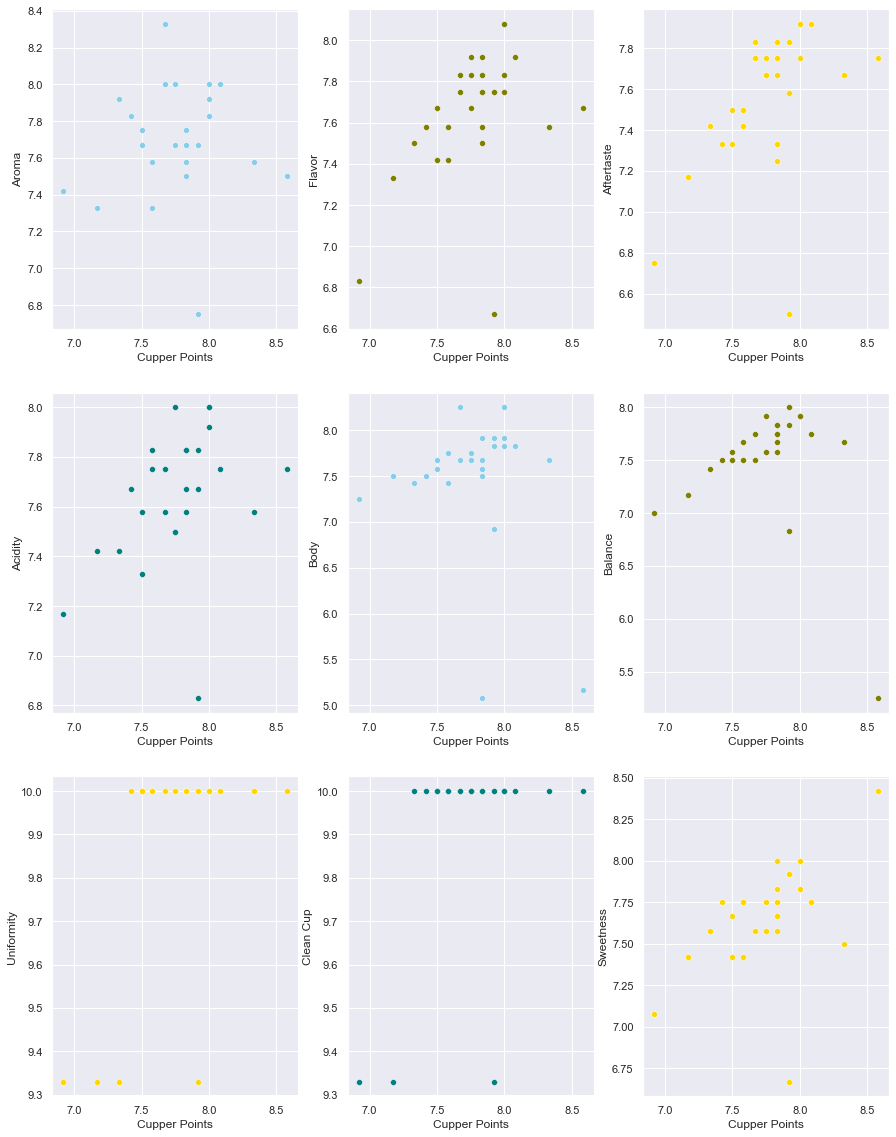

In [876]:
# Checking the correlation among coffee characteristics and Cupper point through Scatterplots.
# The variable "Total.Cup.Points" was not considered since it is the result of adding all measure values.  
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(15, 20))

sns.scatterplot(data=df_robusta_coffee, y="Aroma", x = "Cupper Points", color="skyblue", ax=axs[0, 0])
sns.scatterplot(data=df_robusta_coffee, y="Flavor", x = "Cupper Points", color="olive", ax=axs[0, 1])
sns.scatterplot(data=df_robusta_coffee, y="Aftertaste", x = "Cupper Points", color="gold", ax=axs[0, 2])
sns.scatterplot(data=df_robusta_coffee, y="Acidity", x = "Cupper Points", color="teal", ax=axs[1, 0])
sns.scatterplot(data=df_robusta_coffee, y="Body", x = "Cupper Points", color="skyblue", ax=axs[1, 1])
sns.scatterplot(data=df_robusta_coffee, y="Balance", x = "Cupper Points",  color="olive", ax=axs[1, 2])
sns.scatterplot(data=df_robusta_coffee, y="Uniformity", x = "Cupper Points", color="gold", ax=axs[2, 0])
sns.scatterplot(data=df_robusta_coffee, y="Clean Cup", x = "Cupper Points", color="teal", ax=axs[2, 1])
sns.scatterplot(data=df_robusta_coffee, y="Sweetness", x = "Cupper Points", color="gold", ax=axs[2, 2])

plt.show()

In [877]:
# Beans:
# These variables contain information regarding the beans, such as Harvest year,Processing method,grading year and Expiration.
# Checking the dataset, filtering by beans.
df_robusta_coffee[beans].head(10)

,Species,Harvest Year,Grading Date,Variety,Processing Method,Moisture,Category One Defects,Color,Category Two Defects,Expiration
0,Robusta,2013,"June 26th, 2014",NaN,NaN,12 %,0 full defects,Green,2 full defects,"June 26th, 2015"
1,Robusta,2017,"October 31st, 2017",NaN,Washed / Wet,0 %,0 full defects,NaN,2 full defects,"October 31st, 2018"
2,Robusta,2015,"April 30th, 2015",NaN,NaN,0 %,0 full defects,Green,0 full defects,"April 29th, 2016"
3,Robusta,2013,"July 14th, 2014",NaN,NaN,12 %,0 full defects,Green,7 full defects,"July 14th, 2015"
4,Robusta,2013,"June 26th, 2014",NaN,NaN,12 %,0 full defects,Green,3 full defects,"June 26th, 2015"
5,Robusta,2012,"February 29th, 2012",NaN,NaN,0 %,0 full defects,Green,0 full defects,"February 28th, 2013"
6,Robusta,2014,"May 15th, 2014",NaN,NaN,0 %,0 full defects,Green,0 full defects,"May 15th, 2015"
7,Robusta,2017,"October 25th, 2017",NaN,Washed / Wet,10 %,0 full defects,Bluish-Green,0 full defects,"October 25th, 2018"
8,Robusta,2015,"August 17th, 2016",Other,Washed / Wet,9 %,0 full defects,Green,0 full defects,"August 17th, 2017"
9,Robusta,2014,"August 5th, 2014",NaN,NaN,12 %,0 full defects,Green,6 full defects,"August 5th, 2015"


In [878]:
# Checking missing values
df_robusta_coffee[beans].isna().sum()

Species                  0
Harvest Year             0
Grading Date             0
Variety                 25
Processing Method       18
Moisture                 0
Category One Defects     0
Color                    2
Category Two Defects     0
Expiration               0
dtype: int64

In [879]:
# Replacing NaN values by Unknown
df_robusta_coffee['Harvest Year'][df_robusta_coffee['Harvest Year'].isna()] = 'Unknown'

In [880]:
# Checking Harvest year
df_robusta_coffee['Harvest Year'].value_counts()

2013    11
2014     7
2015     4
2017     2
2012     2
2016     2
Name: Harvest Year, dtype: int64

In [881]:
# Checking Harvest year after modifications.
df_robusta_coffee['Harvest Year'].value_counts()

2013    11
2014     7
2015     4
2017     2
2012     2
2016     2
Name: Harvest Year, dtype: int64

In [882]:
#'Expiration' is exactly 'Grading.Date' + 365 days so dropping 'Expiration'for our analysis, as high correlation doesn't bring any actionable information.

df_robusta_coffee['Harvest Year'] = pd.to_datetime(df_robusta_coffee['Harvest Year'], format='%Y', errors='coerce')
df_robusta_coffee['Grading Date'] = pd.to_datetime(df_robusta_coffee['Grading Date'])
df_robusta_coffee['Expiration'] = pd.to_datetime(df_robusta_coffee['Expiration'])

df_robusta_coffee['date_diff'] = (df_robusta_coffee['Expiration'] - df_robusta_coffee['Grading Date']).dt.days

display(df_robusta_coffee[['Harvest Year', 'Grading Date', 'Expiration']].describe())
display(df_robusta_coffee[['date_diff']].describe())

,Harvest Year,Grading Date,Expiration
count,28,28,28
unique,6,17,17
top,2013-01-01 00:00:00,2014-06-26 00:00:00,2015-06-26 00:00:00
freq,11,3,3
first,2012-01-01 00:00:00,2012-02-29 00:00:00,2013-02-28 00:00:00
last,2017-01-01 00:00:00,2017-10-31 00:00:00,2018-10-31 00:00:00


,date_diff
count,28.0
mean,365.0
std,0.0
min,365.0
25%,365.0
50%,365.0
75%,365.0
max,365.0


In [883]:
# Dropping 'Expiration' column from the dataset.
df_robusta_coffee.drop(['Expiration'],axis=1,inplace=True) 
df_robusta_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Balance,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,Ankole Coffee Producers Coop,1488,Sheema South Western,Ankole coffee producers coop,300,...,10.0,7.92,8.00,Sample 83.75,12 %,0 full defects,Green,2 full defects,Uganda Coffee Development Authority,365
1,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,Kaapi Royale,3170,Chikmagalur Karnataka Indua,Nishant Gurjer Kaapi Royale,320,...,10.0,7.92,8.00,Sample 83.50,0 %,0 full defects,NaN,2 full defects,Specialty Coffee Association,365
2,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,Sethuraman Estate,1000m,Chikmagalur,Nishant Gurjer,300,...,10.0,7.92,8.00,Sample 83.25,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
3,83.00,Robusta,UGACOF,Uganda,UGACOF project area,UGACOF Ltd,1212,Central,UGACOF,320,...,10.0,7.75,8.08,Sample 83.00,12 %,0 full defects,Green,7 full defects,Uganda Coffee Development Authority,365
4,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,Katuka Development Trust Ltd,1200-1300,Luwero central region,Katuka Development Trust Ltd,1,...,10.0,7.75,7.67,Sample 83.00,12 %,0 full defects,Green,3 full defects,Uganda Coffee Development Authority,365


In [884]:
# Checking Variety
df_robusta_coffee.Variety.value_counts()

Other     2
Arusha    1
Name: Variety, dtype: int64

In [885]:
# Checking processing method
df_robusta_coffee['Processing Method'].value_counts()

Natural / Dry    7
Washed / Wet     3
Name: Processing Method, dtype: int64

In [886]:
# Column'variety'has 25 missing values,replacing it with "other".
# Replacing NaN
df_robusta_coffee['Variety'][df_robusta_coffee.Variety.isna()] = 'Other'

In [887]:
# Checking processing method
df_robusta_coffee['Processing Method'].value_counts()

Natural / Dry    7
Washed / Wet     3
Name: Processing Method, dtype: int64

In [888]:
# Checking missing value in Color.
df_robusta_coffee['Color'].value_counts()

Green           20
Blue-Green       3
Bluish-Green     2
None             1
Name: Color, dtype: int64

In [889]:
# Column'Color' has 217 missing values,replacing it with "None" as this category already exist.
# Replacing NaN
df_robusta_coffee['Color'][df_robusta_coffee.Variety.isna()] ='None'
df_robusta_coffee

,Quality_Score,Species,Owner,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Balance,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,Ankole Coffee Producers Coop,1488,Sheema South Western,Ankole coffee producers coop,300,...,10.00,7.92,8.00,Sample 83.75,12 %,0 full defects,Green,2 full defects,Uganda Coffee Development Authority,365
1,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,Kaapi Royale,3170,Chikmagalur Karnataka Indua,Nishant Gurjer Kaapi Royale,320,...,10.00,7.92,8.00,Sample 83.50,0 %,0 full defects,NaN,2 full defects,Specialty Coffee Association,365
2,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,Sethuraman Estate,1000m,Chikmagalur,Nishant Gurjer,300,...,10.00,7.92,8.00,Sample 83.25,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
3,83.00,Robusta,UGACOF,Uganda,UGACOF project area,UGACOF Ltd,1212,Central,UGACOF,320,...,10.00,7.75,8.08,Sample 83.00,12 %,0 full defects,Green,7 full defects,Uganda Coffee Development Authority,365
4,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,Katuka Development Trust Ltd,1200-1300,Luwero central region,Katuka Development Trust Ltd,1,...,10.00,7.75,7.67,Sample 83.00,12 %,0 full defects,Green,3 full defects,Uganda Coffee Development Authority,365
5,82.75,Robusta,Andrew Hetzel,India,NaN,"Cafemakers, LLC","3,000'",Chikmagalur,Sethuraman Estates,200,...,10.00,7.92,7.75,Sample 82.75,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
6,82.58,Robusta,Andrew Hetzel,India,Sethuraman Estates,CafeMakers,750m,Chikmagalur,Nishant Gurjer,320,...,10.00,7.75,7.83,Sample 82.58,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
7,82.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,Kaapi Royale,3140,Chikmagalur Karnataka India,Nishant Gurjer Kaapi Royale,320,...,10.00,7.83,7.92,Sample 82.50,10 %,0 full defects,Bluish-Green,0 full defects,Specialty Coffee Association,365
8,82.50,Robusta,Nishant Gurjer,India,Sethuraman Estate,Kaapi Royale,1000,Chikmagalur Karnataka,Sethuraman Estate Kaapi Royale,320,...,10.00,8.00,7.92,Sample 82.50,9 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
9,82.42,Robusta,UGACOF,Uganda,Ishaka,UGACOF Ltd,900-1300,Western,Nsubuga Umar,320,...,10.00,7.75,7.83,Sample 82.42,12 %,0 full defects,Green,6 full defects,Uganda Coffee Development Authority,365


In [890]:
df_robusta_coffee.fillna('NA', inplace = True)
df_robusta_coffee.head()

,Quality_Score,Species,Owner,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Balance,Cupper Points,Total Cup Points,Moisture,Category One Defects,Color,Category Two Defects,Certification Body,date_diff
0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,Ankole Coffee Producers Coop,1488,Sheema South Western,Ankole coffee producers coop,300,...,10.0,7.92,8.00,Sample 83.75,12 %,0 full defects,Green,2 full defects,Uganda Coffee Development Authority,365
1,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,Kaapi Royale,3170,Chikmagalur Karnataka Indua,Nishant Gurjer Kaapi Royale,320,...,10.0,7.92,8.00,Sample 83.50,0 %,0 full defects,NA,2 full defects,Specialty Coffee Association,365
2,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,Sethuraman Estate,1000m,Chikmagalur,Nishant Gurjer,300,...,10.0,7.92,8.00,Sample 83.25,0 %,0 full defects,Green,0 full defects,Specialty Coffee Association,365
3,83.00,Robusta,UGACOF,Uganda,UGACOF project area,UGACOF Ltd,1212,Central,UGACOF,320,...,10.0,7.75,8.08,Sample 83.00,12 %,0 full defects,Green,7 full defects,Uganda Coffee Development Authority,365
4,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,Katuka Development Trust Ltd,1200-1300,Luwero central region,Katuka Development Trust Ltd,1,...,10.0,7.75,7.67,Sample 83.00,12 %,0 full defects,Green,3 full defects,Uganda Coffee Development Authority,365


In [891]:
Cleaned_csv = df_robusta_coffee.to_csv('robusta_cleaned_data',index= False)